In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
import sklearn.metrics as metrics
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from pandas_profiling import ProfileReport

from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


In [2]:
#Installing via pip pandas profilinng
!pip install -U pandas-profiling

Requirement already up-to-date: pandas-profiling in c:\users\monika\anaconda3\lib\site-packages (2.11.0)


In [3]:
#Read Train and Test Data 

data_train = pd.read_csv("data_train.csv")
data_test = pd.read_csv("data_test.csv")
data_train.head()

age  account if_marital if_default if_housing if_loan if_active_selling  \
0   41     2408         no         no         no      no                no   
1   59     4007        yes         no         no      no                no   
2   35      482        yes         no         no      no                no   
3   49        0        yes         no        yes      no                no   
4   23      834         no         no        yes      no                no   

   duration  label occupation_cleaner  ... occupation_own-business  \
0       122      0                 no  ...                      no   
1       157      0                 no  ...                      no   
2       129      0                 no  ...                      no   
3       772      0                 no  ...                      no   
4       283      0                 no  ...                      no   

  occupation_production occupation_retired occupation_services  \
0                    no                 no                  no   
1                    no                yes                  no   
2                    no                 no                  no   
3                    no                 no                  no   
4                    no                 no                  no   

  occupation_student occupation_technician occupation_unemployed  \
0                 no                    no                    no   
1                 no                    no                    no   
2                 no                    no                    no   
3                 no                    no                   yes   
4                yes                    no                    no   

  education_primary education_secondary education_unknown  
0                no                  no                no  
1               yes                  no                no  
2                no                  no                no  
3                no                  no                no  
4                no                 yes                no  

[5 rows x 21 columns]

In [4]:
# Pre-Processing data 
# One hot encode all categorical columns




In [5]:
one_hot_cols=["if_marital","if_default","if_housing","if_loan","if_active_selling", "occupation_cleaner",
              "occupation_management","occupation_own-business","occupation_production","occupation_retired",
              "occupation_services","occupation_student","occupation_technician","occupation_unemployed",
              "education_primary","education_secondary","education_unknown"]


data_train[one_hot_cols] = data_train[one_hot_cols].apply(LabelEncoder().fit_transform)
print(data_train.head())

data_test[one_hot_cols] = data_test[one_hot_cols].apply(LabelEncoder().fit_transform)
print(data_test.head())

#data_train=pd.get_dummies(data_train, columns=one_hot_cols)
#data_test=pd.get_dummies(data_test, columns=one_hot_cols)






   age  account  if_marital  if_default  if_housing  if_loan  \
0   41     2408           0           0           0        0   
1   59     4007           1           0           0        0   
2   35      482           1           0           0        0   
3   49        0           1           0           1        0   
4   23      834           0           0           1        0   

   if_active_selling  duration  label  occupation_cleaner  ...  \
0                  0       122      0                   0  ...   
1                  0       157      0                   0  ...   
2                  0       129      0                   0  ...   
3                  0       772      0                   0  ...   
4                  0       283      0                   0  ...   

   occupation_own-business  occupation_production  occupation_retired  \
0                        0                      0                   0   
1                        0                      0                   1   

In [6]:
# Use Pandas profiling to see feature stats for train
profile = ProfileReport(data_train, title='MPG Pandas Profiling Report', explorative = True)
profile

In [7]:
# Use Pandas profiling to see feature stats for test
profile_test = ProfileReport(data_test, title='MPG Pandas Profiling Report', explorative = True)
profile_test

In [8]:
X_train= data_train.loc[:, data_train.columns != 'label']
Y_train=data_train['label']
print(X_train.head())
print(Y_train)
X_test= data_test.loc[:, data_test.columns != 'label']
Y_test=data_test['label']

   age  account  if_marital  if_default  if_housing  if_loan  \
0   41     2408           0           0           0        0   
1   59     4007           1           0           0        0   
2   35      482           1           0           0        0   
3   49        0           1           0           1        0   
4   23      834           0           0           1        0   

   if_active_selling  duration  occupation_cleaner  occupation_management  \
0                  0       122                   0                      1   
1                  0       157                   0                      0   
2                  0       129                   0                      1   
3                  0       772                   0                      0   
4                  0       283                   0                      0   

   occupation_own-business  occupation_production  occupation_retired  \
0                        0                      0                   0   
1     

In [9]:
# Pre-procesing train columns
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
names = X_train.columns
d = scaler.fit_transform(X_train)
X_train = pd.DataFrame(d, columns=names)
print(X_train.head())


names = X_test.columns
d = scaler.fit_transform(X_test)
X_test = pd.DataFrame(d, columns=names)
print(X_test.head())

        age   account  if_marital  if_default  if_housing  if_loan  \
0  0.319444  0.073853         0.0         0.0         0.0      0.0   
1  0.569444  0.100766         1.0         0.0         0.0      0.0   
2  0.236111  0.041437         1.0         0.0         0.0      0.0   
3  0.430556  0.033325         1.0         0.0         1.0      0.0   
4  0.069444  0.047362         0.0         0.0         1.0      0.0   

   if_active_selling  duration  occupation_cleaner  occupation_management  \
0                0.0  0.035273                 0.0                    1.0   
1                0.0  0.045825                 0.0                    0.0   
2                0.0  0.037383                 0.0                    1.0   
3                0.0  0.231233                 0.0                    0.0   
4                0.0  0.083811                 0.0                    0.0   

   occupation_own-business  occupation_production  occupation_retired  \
0                      0.0                 

In [10]:
print(Y_train.value_counts(normalize=True))
class_wt_zero= Y_train.value_counts(normalize=True)[0]
print(class_wt_zero)
print(Y_test.value_counts(normalize=True))
class_wt_one= Y_train.value_counts(normalize=True)[1]

clf = LogisticRegression(random_state=0, max_iter =50,class_weight={0.0:class_wt_zero,1.0:class_wt_one}).fit(X_train, Y_train)
Y_pred=clf.predict(X_test)
recall_score(Y_test, Y_pred)
print(classification_report(Y_test, Y_pred, labels=[0,1]))





0    0.883636
1    0.116364
Name: label, dtype: float64
0.8836363636363637
0    0.93
1    0.07
Name: label, dtype: float64
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        93
           1       0.00      0.00      0.00         7

    accuracy                           0.93       100
   macro avg       0.47      0.50      0.48       100
weighted avg       0.86      0.93      0.90       100



C:\Users\monika\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [11]:

ran = RandomForestClassifier(max_depth=2, random_state=0, n_estimators=30,class_weight={0:class_wt_zero,1:class_wt_one} )
ran.fit(X_train, Y_train)
Y_pred=ran.predict(X_test)
recall_score(Y_test,Y_pred, zero_division=0)
importances = ran.feature_importances_
print(importances)
print(classification_report(Y_test, Y_pred, labels=[0,1]))
# summarize feature importance
for name, importance in zip(X_train, ran.feature_importances_):
    print(name, "=", importance)


[0.2049352  0.0769865  0.05586195 0.         0.0886898  0.01856418
 0.06487804 0.37688161 0.         0.         0.         0.00447067
 0.04719031 0.         0.02923868 0.         0.         0.01188363
 0.02041942 0.        ]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        93
           1       0.00      0.00      0.00         7

    accuracy                           0.93       100
   macro avg       0.47      0.50      0.48       100
weighted avg       0.86      0.93      0.90       100

age = 0.20493519905782592
account = 0.07698649938805617
if_marital = 0.055861946204490906
if_default = 0.0
if_housing = 0.0886897993536193
if_loan = 0.018564184886849168
if_active_selling = 0.06487804010713949
duration = 0.37688161449895846
occupation_cleaner = 0.0
occupation_management = 0.0
occupation_own-business = 0.0
occupation_production = 0.004470669200406608
occupation_retired = 0.0471903145295631
occupation_services = 0.0
occupation_st

C:\Users\monika\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


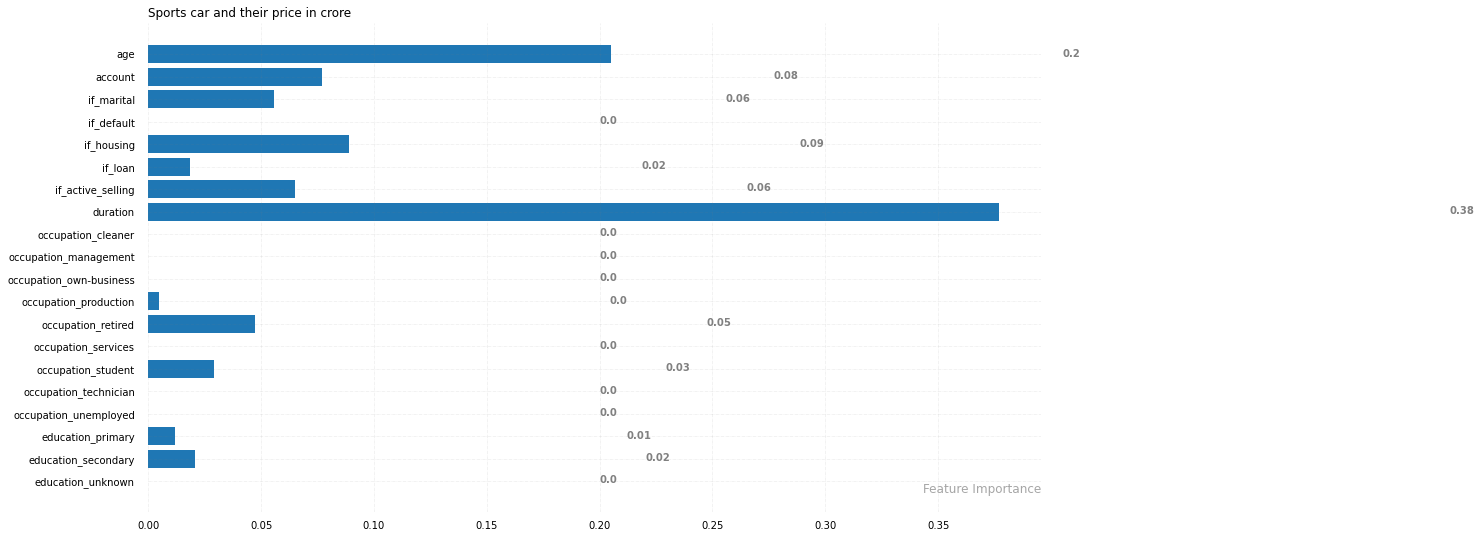

In [12]:
%matplotlib inline

# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh( X_train.columns, ran.feature_importances_)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Sports car and their price in crore',
             loc ='left', )
 
# Add Text watermark
fig.text(0.9, 0.15, 'Feature Importance', fontsize = 12,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.7)
 
# Show Plot
plt.show()

In [13]:
#Grid Search CV on Tree algorithm

rfc=RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, Y_train)

print(CV_rfc.best_params_)

#{'criterion': 'gini', 'max_depth': 7, 'max_features': 'auto', 'n_estimators': 500}


{'criterion': 'gini', 'max_depth': 7, 'max_features': 'auto', 'n_estimators': 500}


In [14]:

ran = RandomForestClassifier(max_depth=7, random_state=0, criterion='gini', max_features='auto', n_estimators=500)
ran.fit(X_train, Y_train)
Y_pred=ran.predict(X_test)
recall_score(Y_test,Y_pred, zero_division=0)
importances = ran.feature_importances_
print(importances)
print(classification_report(Y_test, Y_pred, labels=[0,1]))
# summarize feature importance
for name, importance in zip(X_train, ran.feature_importances_):
    print(name, "=", importance)


[0.15831578 0.11016542 0.02367226 0.003013   0.0527799  0.01333975
 0.02402889 0.51632038 0.00479764 0.00748572 0.00429432 0.00937386
 0.0147649  0.00456742 0.00992383 0.00667924 0.00312609 0.01270306
 0.01245289 0.00819564]
              precision    recall  f1-score   support

           0       0.94      0.86      0.90        93
           1       0.13      0.29      0.18         7

    accuracy                           0.82       100
   macro avg       0.54      0.57      0.54       100
weighted avg       0.88      0.82      0.85       100

age = 0.15831578288193407
account = 0.11016542230446805
if_marital = 0.023672255875341552
if_default = 0.003012998785755122
if_housing = 0.05277989700949185
if_loan = 0.013339753370574414
if_active_selling = 0.02402889438147971
duration = 0.5163203829828088
occupation_cleaner = 0.004797636030305525
occupation_management = 0.007485717884665989
occupation_own-business = 0.004294319136088209
occupation_production = 0.009373864847145724
occupation_

In [15]:
# Random Search CV
from scipy.stats import randint as sp_randint

param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run randomized search
n_iter_search = 20
random_search = RandomizedSearchCV(ran, param_distributions=param_dist,
                                   n_iter=n_iter_search)

random_search.fit(X_train, Y_train)

print(random_search.best_params_)


{'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 10, 'min_samples_leaf': 3}
